In [1]:
# --- Parte 1: Imports ---
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Importar nuestro script de preprocesamiento
sys.path.append(os.path.abspath(".."))  # asegurar que Jupyter encuentre la carpeta scripts
from scripts.preprocessing import load_and_preprocess

# Cargar datos y preprocessor
X_train, X_test, y_train, y_test, preprocessor = load_and_preprocess()


In [2]:
from sklearn import set_config
set_config(display="diagram")  # para ver el pipeline como diagrama

# Crear pipeline con preprocessor + KNN (default n_neighbors=5)
knn_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])

# Entrenar el modelo
knn_clf.fit(X_train, y_train)

# Predicciones
y_train_pred = knn_clf.predict(X_train)
y_test_pred = knn_clf.predict(X_test)

# Métricas
print("Reporte en TRAIN (KNN inicial):")
print(classification_report(y_train, y_train_pred))

print("\nReporte en TEST (KNN inicial):")
print(classification_report(y_test, y_test_pred))


Reporte en TRAIN (KNN inicial):
              precision    recall  f1-score   support

           0       0.76      0.60      0.67        42
           1       0.86      0.93      0.89       114

    accuracy                           0.84       156
   macro avg       0.81      0.76      0.78       156
weighted avg       0.83      0.84      0.83       156


Reporte en TEST (KNN inicial):
              precision    recall  f1-score   support

           0       0.22      0.18      0.20        11
           1       0.70      0.75      0.72        28

    accuracy                           0.59        39
   macro avg       0.46      0.47      0.46        39
weighted avg       0.57      0.59      0.58        39



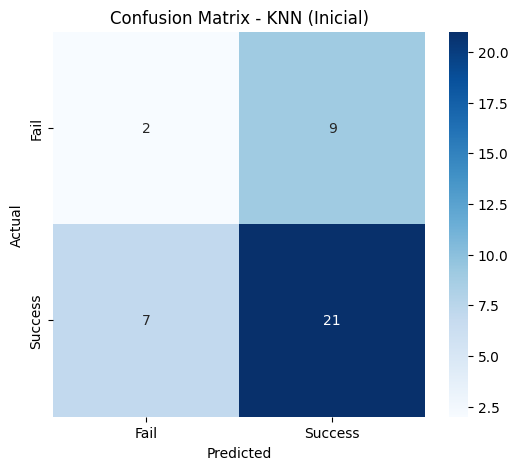

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión para KNN inicial
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fail", "Success"],
            yticklabels=["Fail", "Success"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (Inicial)")
plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV

# Definir pipeline
knn_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])

# Definir grid de parámetros
param_grid = {
    "classifier__n_neighbors": [3, 5, 7, 9, 11],
    "classifier__weights": ["uniform", "distance"],
    "classifier__metric": ["minkowski", "euclidean", "manhattan"]
}

# GridSearch
grid_search = GridSearchCV(
    knn_clf,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Entrenar GridSearch
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor score en validación cruzada:")
print(grid_search.best_score_)


Mejores parámetros encontrados:
{'classifier__metric': 'minkowski', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}

Mejor score en validación cruzada:
0.8014112903225806


Reporte en TRAIN (mejor KNN):
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.96      0.98      0.97       114

    accuracy                           0.96       156
   macro avg       0.95      0.93      0.94       156
weighted avg       0.95      0.96      0.95       156


Reporte en TEST (mejor KNN):
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.79      0.79      0.79        28

    accuracy                           0.69        39
   macro avg       0.62      0.62      0.62        39
weighted avg       0.69      0.69      0.69        39



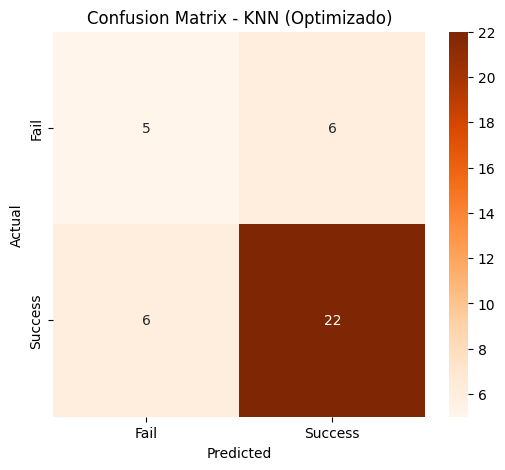

In [5]:
# Mejor modelo
best_knn = grid_search.best_estimator_

# Predicciones
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print("Reporte en TRAIN (mejor KNN):")
print(classification_report(y_train, y_train_pred))

print("\nReporte en TEST (mejor KNN):")
print(classification_report(y_test, y_test_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Fail", "Success"],
            yticklabels=["Fail", "Success"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (Optimizado)")
plt.show()
